# <div style = 'background-color:#50474E'> <center><font color='#F2DD6C'>Machine Learning aplicado a la detección de fraudes bancarios</div><div style = 'background-color:#50474E'> <center>.<font color='#50474E'></div>

El fraude bancario se refiere a cualquier acción intencional destinada a obtener un beneficio económico indebido perjudicando a una entidad financiera o a sus clientes.
El objetivo del análisis con Machine Learning es detectar patrones anómalos o sospechosos en los datos transaccionales o crediticios antes de que el fraude ocurra o se concrete.

Los tipos más comunes de fraude:

- Fraude con tarjetas de crédito/débito: Transacciones no autorizadas, uso de datos robados o clonados, compras online con tarjetas comprometidas.

- Fraude de identidad: Solicitudes de crédito o préstamos con documentación falsificada, suplantación de identidad de clientes reales.

- Fraude interno: Manipulación de datos o procesos por parte de empleados, acceso indebido a cuentas o registros.

- Fraude en transferencias electrónicas: Desvío de fondos a cuentas no autorizadas, phishing, smishing o ingeniería social.

- Lavado de dinero: Uso del sistema bancario para legitimar fondos ilícitos mediante múltiples transacciones pequeñas.

Estas tipologías permiten entender los distintos patrones de fraude que los modelos deben aprender a detectar.
Para ello, se emplean indicadores operativos y financieros que ayudan a identificar operaciones anómalas o perfiles de riesgo dentro de las transacciones bancarias.

Entre los más comunes se encuentran:

**a) Ratio de Transacción Sospechosa (RTS):**

$$
RTS = \frac{\text{Monto de transacciones sospechosas}}{\text{Monto total de transacciones del cliente}}
$$

Este indicador mide qué proporción del volumen total del cliente corresponde a operaciones marcadas como sospechosas.
Cuando el valor de RTS supera cierto umbral (por ejemplo, 0.05 o 0.10 según la política interna de cada entidad), puede reflejar una actividad irregular a revisar.

**b) Variación de Monto Transaccional (VMₜ):**

$$
VM_t = \frac{|M_t - M_{hist}|}{M_{hist}}
$$
Donde:

$M_t$: monto total de transacciones en el período actual

$M_{hist}$: promedio histórico de montos del cliente


Aqui se compara el monto actual de una transacción con el promedio histórico del cliente.
Un VMₜ elevado indica operaciones atípicas respecto al comportamiento habitual.

c) **Frecuencia de Transacciones (Fᵢ):**

$$F_i = \frac{\text{Días del período analizado}}{\text{N° de transacciones en el período}}$$

Permite detectar incrementos súbitos en la frecuencia de operaciones, lo que puede sugerir automatización o uso indebido de credenciales.

d) **Ratio de Ubicación Atípica (RL):**

$$ RL = \frac{\text{N° de operaciones fuera del país habitual}}{\text{Total de operaciones}}$$

Un valor alto puede señalar movimientos inusuales en regiones donde el cliente no opera habitualmente, alertando sobre posibles fraudes geográficos.

Estas fórmulas permiten cuantificar el comportamiento de los clientes y traducirlo en variables numéricas que luego sirven como entradas del modelo predictivo. En este sentido, el fraude, desde el enfoque del Machine Learning, se aborda como un problema de clasificación binaria, donde el objetivo es distinguir entre operaciones legítimas y operaciones fraudulentas. En este tipo de análisis, suele presentarse un fuerte desbalance de clases, ya que de miles de registros disponibles, solo una pequeña proporción corresponde efectivamente a casos de fraude.

Debido a esta característica, los modelos más utilizados para este tipo de problemas suelen ser aquellos capaces de manejar bases de datos desbalanceadas, tales como:

- Regresión Logística

- Árboles de Decisión y Random Forest

- XGBoost o LightGBM

- Redes Neuronales (en escenarios más complejos)

Estos modelos se complementan con técnicas específicas para equilibrar las clases, como oversampling (SMOTE), undersampling o el uso de ponderación de clases (class weights).

Como los casos de fraude son muy pocos en comparación con los casos legítimos, las métricas tradicionales como la exactitud (accuracy) pueden resultar engañosas. Por ejemplo, un modelo que clasifica todo como “no es fraude” podría tener una precisión del 99 %, pero en realidad no estaría detectando ningún caso fraudulento.

Por este motivo, se utilizan métricas específicas que permiten evaluar mejor el rendimiento del modelo frente a este tipo de situaciones:

- Precisión: mide qué proporción de las operaciones que el modelo predijo como fraude realmente lo son. Es clave cuando se busca reducir los falsos positivos (casos legítimos marcados erróneamente como fraude).

- Recall o Sensibilidad: indica qué porcentaje de los fraudes reales fueron correctamente detectados por el modelo. Es fundamental cuando la prioridad es no dejar escapar fraudes verdaderos.

- F1-Score: combina precisión y recall en una sola métrica, siendo útil para encontrar un equilibrio entre ambos.

- AUC-ROC (Área bajo la curva ROC): evalúa la capacidad del modelo para distinguir entre clases en distintos umbrales de decisión. Cuanto más se acerque a 1, mejor es la capacidad discriminante.

- Matriz de confusión: muestra de forma detallada cuántas predicciones fueron verdaderas o falsas para cada clase, permitiendo identificar el tipo de error que más comete el modelo (falsos positivos o falsos negativos).


En este notebook aplico técnicas de Machine Learning orientadas a la detección de fraude bancario, con el objetivo de identificar transacciones potencialmente fraudulentas a partir de patrones en los datos.
El proceso incluye la preparación y normalización del dataset, análisis exploratorio para evaluar distribuciones y desequilibrio de clases, y la implementación comparativa de modelos utilizados.
Finalmente, se evalúa el rendimiento de cada modelo mediante métricas como Precision, Recall y F1-Score, priorizando la capacidad de detección de fraudes minimizando falsos negativos.

#### Indice

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Preparación y limpieza de los datos](#0)<br>
2.  [Analisis exploratorio de los datos](#1)<br>
3.  [Modelado y evaluación](#2) <br>
4.  [Concluciones](#3) <br>

</div>

## <div style = 'background-color:#50474E'> <center><font color='white'>① Preparación y limpieza de los datos </font></div> <a id="0"></a>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning) # Borrar warnings

In [2]:
df = pd.read_csv("Fraude_bancario.csv")

In [3]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Este conjunto de datos contiene únicamente variables de entrada numéricas que son el resultado de una transformación PCA (Análisis de Componentes Principales).
Debido a cuestiones de confidencialidad, no se proporcionan las variables originales ni información adicional sobre el contexto de los datos.
Las únicas variables que no fueron transformadas son:
- Time: Representa los segundos transcurridos entre cada transacción y la primera transacción del dataset.
- Amount: Indica el monto de la transacción. 
- Class: La variable objetivo toma el valor 1 en caso de fraude y 0 en caso contrario.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


In [6]:
df.isnull().sum()[df.isnull().sum() > 0] # Mostrar solo valores nulos de cada campo.

Series([], dtype: int64)

## <div style = 'background-color:#50474E'> <center><font color='white'>② Analisis exploratorio de los datos (EDA) </font></div><a id="1"></a>

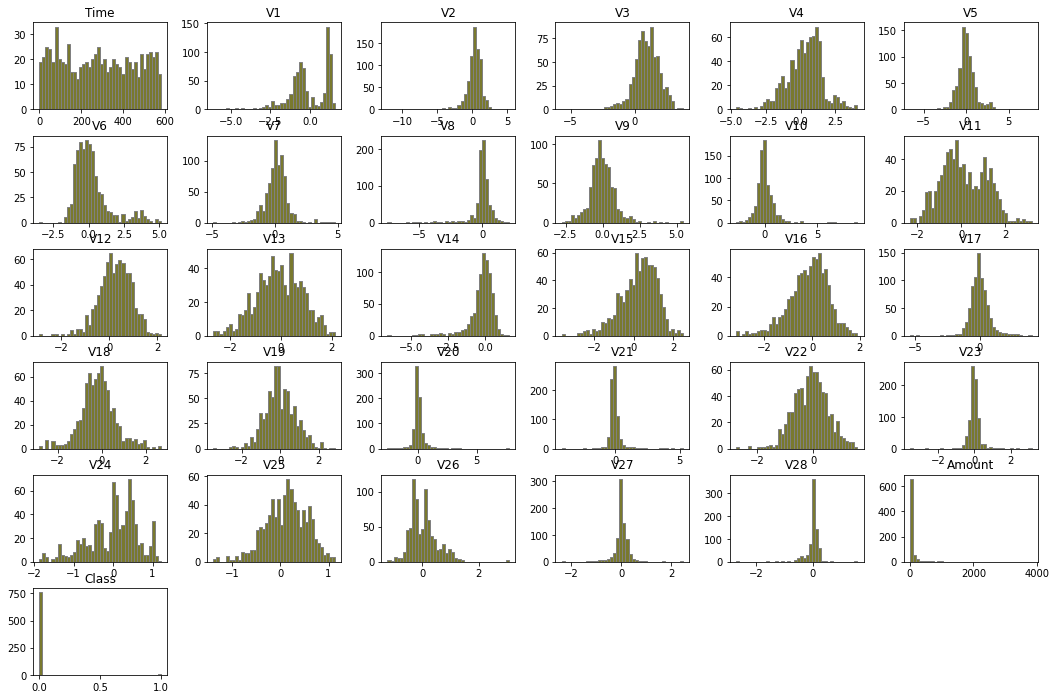

In [7]:
_ = df.hist(figsize=(18, 12), bins=40, color='#79792E', edgecolor='gray', grid=False)

# _ = para evitar imprimir el array

Se presentan los histogramas de todos los campos del dataset, donde el eje X representa los valores posibles de cada variable y el eje Y su frecuencia de aparición.
En general, las distribuciones son simétricas y con forma aproximadamente normal, centradas en torno a su media. Solo unas pocas variables muestran ligeros sesgos hacia la derecha o hacia la izquierda.
No se observan variables con distribuciones bimodales o multimodales, a excepción del campo “Class”.
Dado que los campos están identificados como V1, V2, etc., no es posible conocer su significado específico, ya que por razones de confidencialidad los datos fueron transformados. Por lo tanto, no se conoce la composición exacta de cada variable; sin embargo, podrían incluir combinaciones de atributos originales como montos de transacción, tiempo, tipo de operación, ubicación del cliente o patrones de comportamiento, concentrando en un solo valor o campo.

In [8]:
print (df.Class.value_counts())
print("Se evidencia un alto desbalance de los valores, menos del 1.2% de las operaciones del dataset son fraudulentas")

Class
0    763
1      9
Name: count, dtype: int64
Se evidencia un alto desbalance de los valores, menos del 1.2% de las operaciones del dataset son fraudulentas


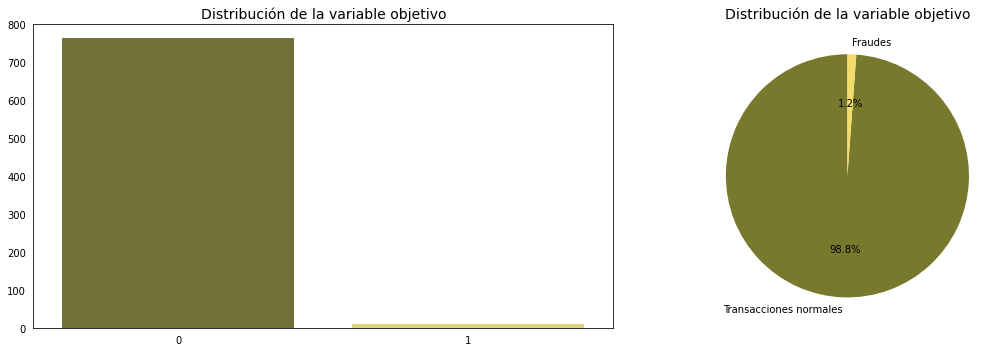

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para imprimir figura con dos subplots uno al lado de otro.
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x='Class', data=df, palette=['#79792E','#F2DD6C'], ax=ax[0]) # Barra
ax[0].set_title('Distribución de la variable objetivo', fontsize=14)
ax[0].tick_params(left=False, bottom=False)  # Quitar ticks
ax[0].grid(False)
ax[0].set_xlabel('')  # Para quitar nombres de los ejes
ax[0].set_ylabel('')  # Para quitar nombres de los ejes

cuentas = df['Class'].value_counts() # Grafico torta
labels = ['Transacciones normales', 'Fraudes']
sizes = [cuentas.get(0,0), cuentas.get(1,0)]

ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#79792E','#F2DD6C'], startangle=90)
ax[1].set_title('Distribución de la variable objetivo', fontsize=14)

plt.tight_layout()
plt.show()


En este tipo de datasets, los outliers son información, no ruido. Porque esas son las transacciones anómalas que quiero detectar. Aquí son la fuente principal de información relevante donde cada registro inusual puede reflejar una maniobra irregular, un intento de fraude o una desviación significativa de la conducta típica del cliente.

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

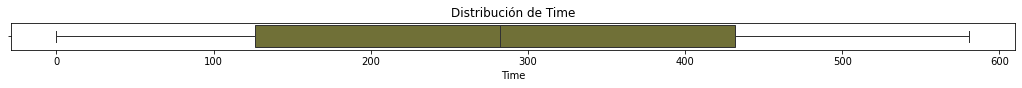

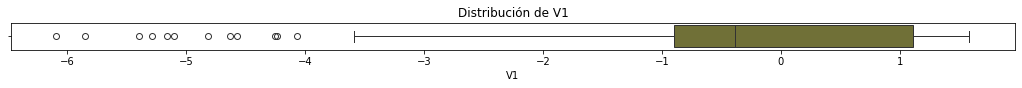

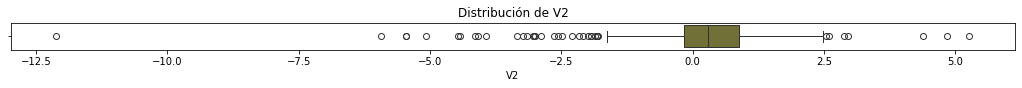

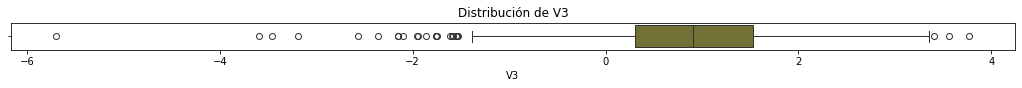

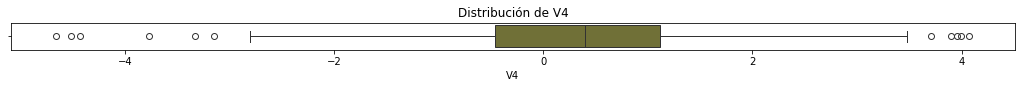

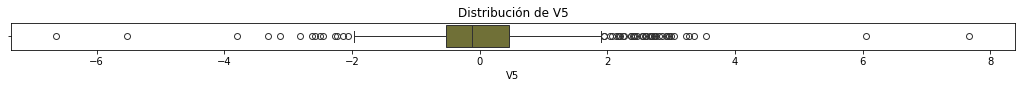

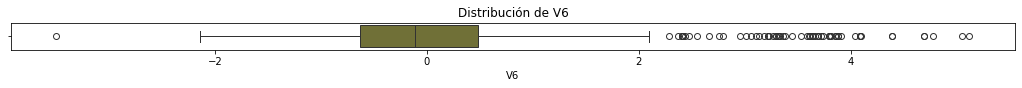

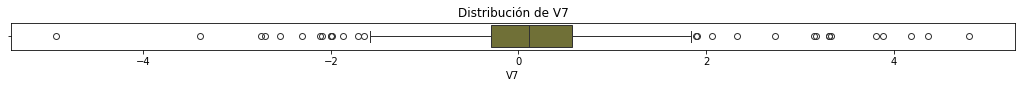

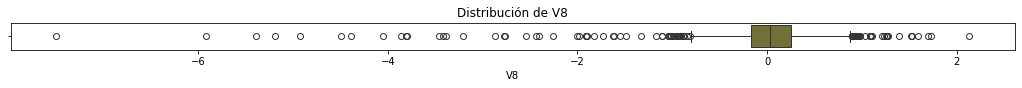

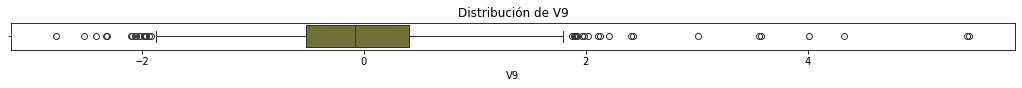

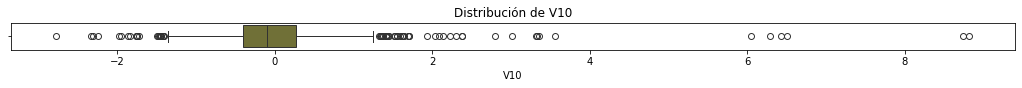

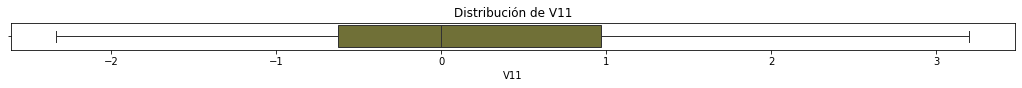

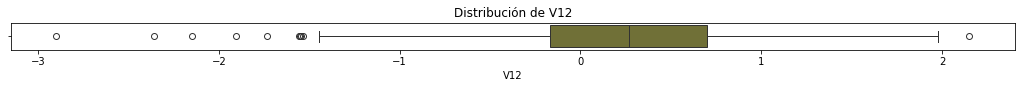

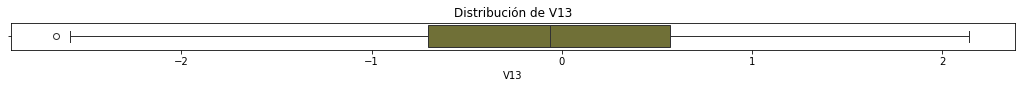

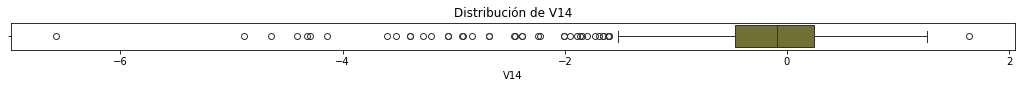

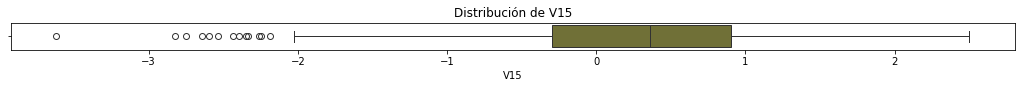

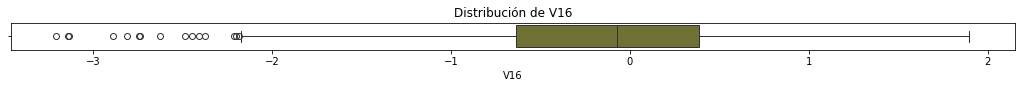

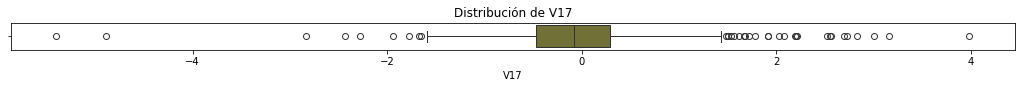

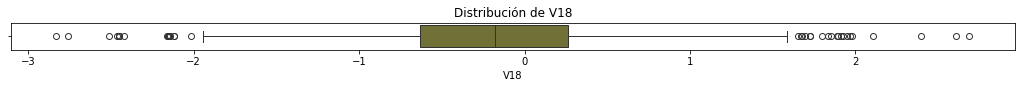

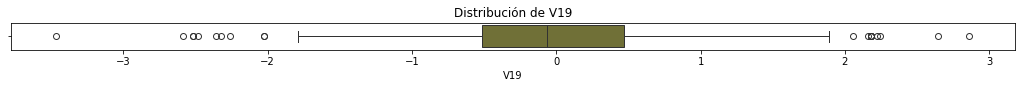

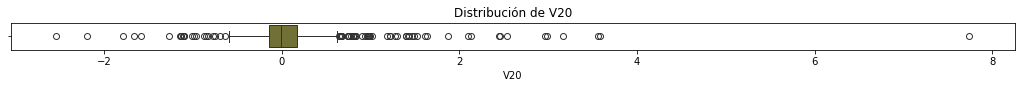

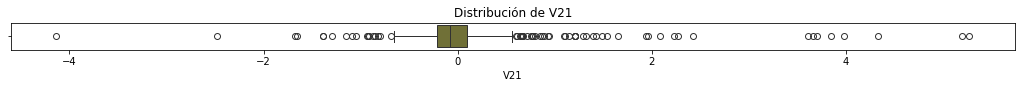

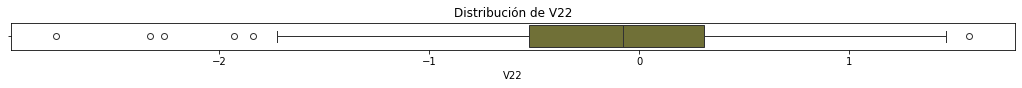

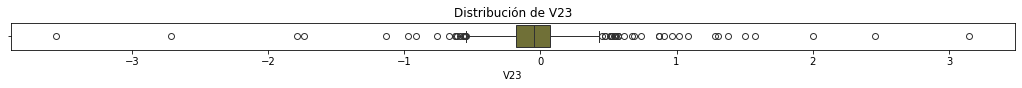

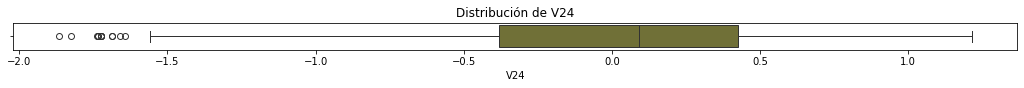

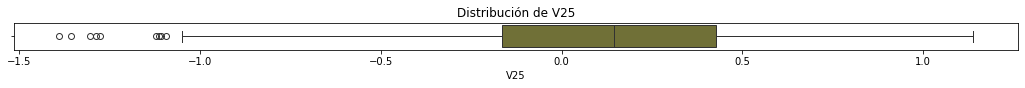

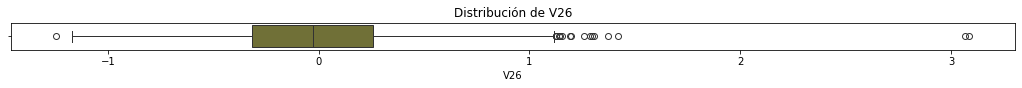

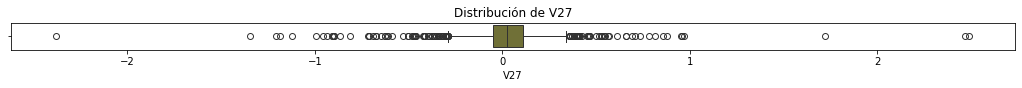

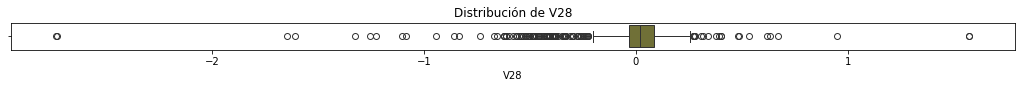

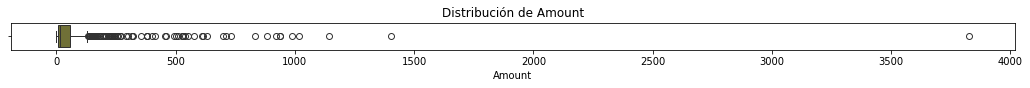

In [11]:
for col in ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']:
    plt.figure(figsize=(18, 0.5))
    sns.boxplot(x=df[col], color="#79792E")
    plt.title(f"Distribución de {col}")
    plt.show()

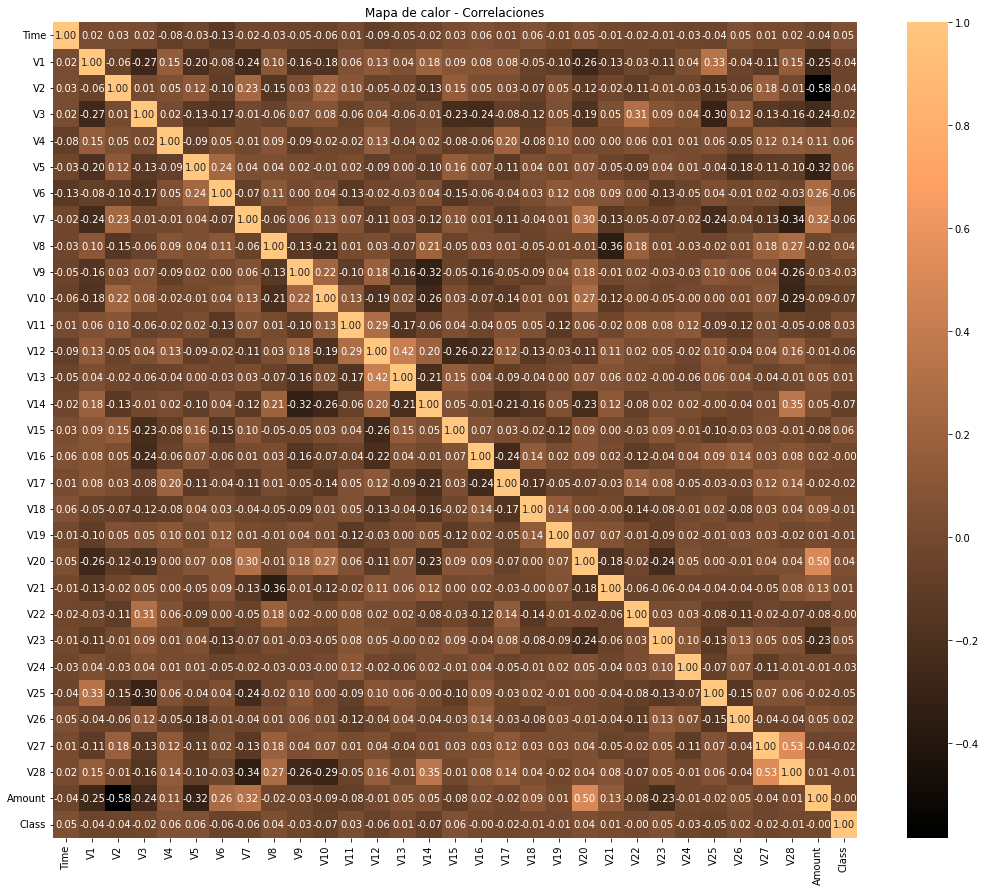

In [12]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='copper')
plt.title('Mapa de calor - Correlaciones')
plt.show()

In [13]:
K = 7 # Definimos cuantas columnas me va a seleccionar como las mas correlacionadas.

cols = corr_matrix.nlargest(K, "Time")["Time"].index

cols


Index(['Time', 'V18', 'V16', 'Class', 'V26', 'V20', 'V15'], dtype='object')

In [14]:
cm = np.corrcoef(df[cols].values.T)

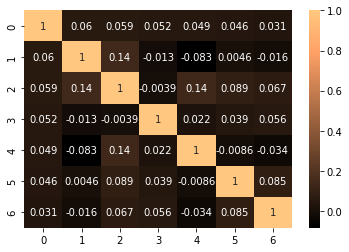

In [15]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, cmap="copper")
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Time'>

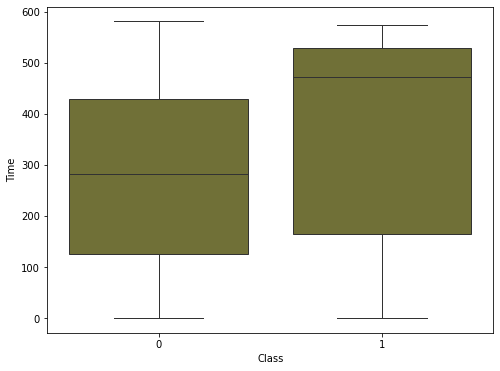

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Time', data=df, color='#79792E', fliersize=5,           # tamaño de los outliers
    flierprops={'marker':'x', 'color':'red', 'alpha':0.5})

Analizando las variables Time y Class, se observa que las operaciones normales (Class = 0) presentan una distribución bastante regular: la caja es simétrica y sin anomalías visibles.

En contraste la caja correspondiente a los casos de fraude (Class = 1) se encuentra desplazada hacia valores más altos de tiempo (Time) lo que indica que estas operaciones tienden a producirse en momentos más tardes. Además el bigote superior es corto reflejando poca variabilidad en los valores más altos, mientras que el bigote inferior más extendido muestra mayor dispersión en los registros de tiempos más bajos.

Se ve también que incluso los fraudes ocurridos más temprano tienden a registrarse en promedio más tarde que muchas transacciones de las normales (El cuartil 1 de la caja que representa Fraude es mas alto que el cuartil 1 de las operaciones normales).

Es importante destacar que la mediana de las operaciones fraudulentas se ubica por encima del tercer cuartil de las operaciones normales, lo que implica que más de la mitad de los fraudes suceden después del 75 % de las transacciones legítimas. Esto indica que los fraudes se concentran en una franja temporal superior donde la cantidad de operaciones normales es considerablemente menor. En consecuencia la probabilidad de fraude aumenta en los momentos más tardíos lo que podría reflejar un patrón de comportamiento.

<AxesSubplot:xlabel='Class', ylabel='V15'>

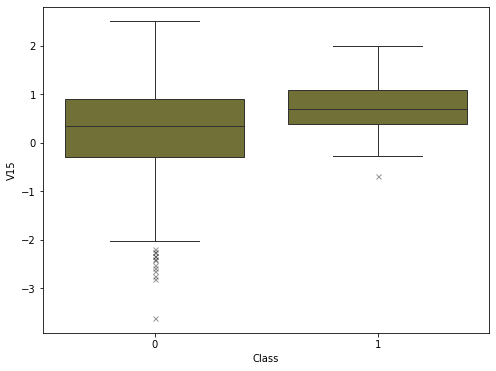

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='V15', data=df, color='#79792E', fliersize=5,           # tamaño de los outliers
    flierprops={'marker':'x', 'color':'orange', 'alpha':0.5})

Las transacciones normales presentan una distribución amplia y bastante simétrica, con bigotes superiores e inferiores más extensos que el rango intercuartílico (Q1–Q3), lo que refleja una variabilidad considerable. Se observan además numerosos valores atípicos en el extremo inferior, ubicados aproximadamente entre –2 y –4.

En cambio, la caja correspondiente a los casos de fraude es más pequeña, mostrando menor variabilidad y valores de V15 más concentrados y predominantemente positivos, sin una dispersión marcada ni presencia significativa de outliers.

Aun sin conocer el significado específico de V15, el diagrama de cajas sugiere que esta variable podría tener capacidad discriminante entre clases, dado que las distribuciones de normales y fraudes presentan comportamientos claramente diferenciados.

<AxesSubplot:xlabel='Class', ylabel='V20'>

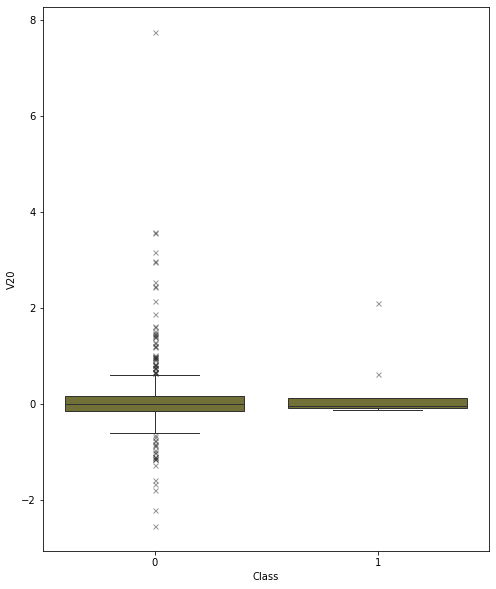

In [18]:
plt.figure(figsize=(8, 10))
sns.boxplot(x='Class', y='V20', data=df, color='#79792E', fliersize=5,           # tamaño de los outliers
    flierprops={'marker':'x', 'color':'orange', 'alpha':0.5})

Sin conocer el significado y composición exacta del campo V20 se puede hacer una interpretación. La variable V20 distingue con claridad los comportamientos entre clases, mientras las transacciones normales presentan alta dispersión y presencia de valores extremos, las operaciones fraudulentas muestran una concentración marcada en torno a cero, con muy baja variabilidad. Esto sugiere que V20 podría tener un fuerte poder discriminante y aportar información relevante en la clasificación.

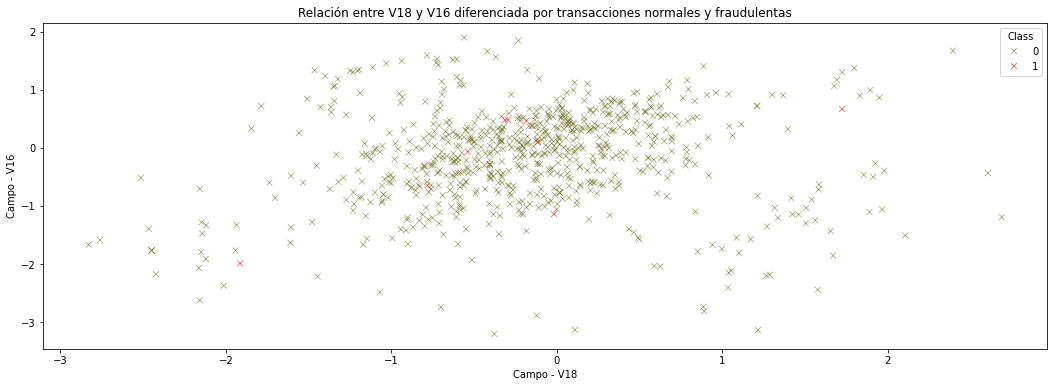

In [19]:
plt.figure(figsize=(18, 6))
sns.scatterplot(
    data=df,
    x='V18',
    y='V16',
    hue='Class', # Muestro el grafico dividido por Class, Fraude en rojo las demas en marron.
    palette={0: '#79792E', 1: 'red'},  # opcional, para distinguir mejor
    marker='x'
)
plt.title('Relación entre V18 y V16 diferenciada por transacciones normales y fraudulentas')
plt.xlabel('Campo - V18')
plt.ylabel('Campo - V16')
plt.show()


Aca grafico 2 de los campos mas correlacionados. Las transacciones normales muestran una dispersión amplia entre V18 y V16, mientras que las fraudulentas se concentran cerca del origen, con menor variabilidad. Esto sugiere que las transacciones fraudulentas tienden a comportarse de manera más parecida entre sí en estas dos variables.

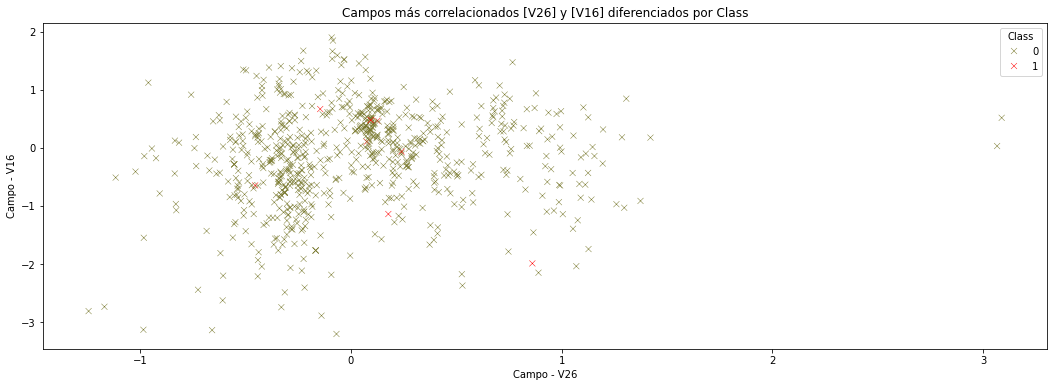

In [20]:
plt.figure(figsize=(18,6))
sns.scatterplot(
    x='V26', 
    y='V16', 
    hue='Class', 
    data=df,
    palette={0: '#79792E', 1: 'red'},  # color verde oscuro para normales, rojo para fraudes
    marker='x',
    edgecolor=None
)
plt.title('Campos más correlacionados [V26] y [V16] diferenciados por Class')
plt.xlabel('Campo - V26')
plt.ylabel('Campo - V16')
plt.legend(title='Class', loc='upper right')
plt.show()

Las operaciones normales se reparten entre valores negativos y positivos de V26, con V16 concentrado cerca de cero. En cambio, las fraudulentas se agrupan sobre todo alrededor de V26 = 0.1 y V16 = <entre -0.5 y 1>, mostrando un patrón más localizado.

## <div style = 'background-color:Black'> <center><font color='white'>③ Modelado y evaluación </font></div><a id="2"></a>

## ❑ Random Forest (Bosques Aleatorios)

Como punto de partida, empleo un modelo de Random Forest para establecer una solución de referencia (benchmark). Esto me permite contar con una base sobre la cual comparar el desempeño de otros algoritmos. 

En este tipo de problemas el objetivo no se centra en maximizar la precisión global (accuracy) ya que esta métrica puede resultar engañosa ante un fuerte desbalance de clases. Porque un modelo que clasifique todo como “no es fraude” obtendría una alta precisión, pero no tendría utilidad.

Por esto el foco de mi análisis se orienta hacia métricas que reflejen mejor el comportamiento del modelo sobre la clase minoritaria (la clase 1, correspondiente al fraude). En particular maximizar el Recall, que mide la proporción de fraudes correctamente detectados, sin dejar de lado la Precisión que indica qué porcentaje de las operaciones clasificadas como fraudulentas lo son efectivamente.

Un modelo con Recall alto ayuda a reducir el riesgo de dejar fraudes sin detectar y un nivel adecuado de Precision evita generar demasiadas falsas alertas que podrían saturar los sistemas de control o generar costos innecesarios.

In [21]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Class"] # Aca le pido que Y sea mi objetivo a predecir
X = data.drop(["Class"], axis=1) # Aplico que X sean todas las columnas menos la del objetivo.
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.30,
                                     random_state=42,
                                     stratify=y) # Las proporciones se mantienen en ambos conjuntos. Tanto train como test tendrian similares cantidades de ambas clases.

In [23]:
model = RandomForestClassifier(random_state=42, 
                               n_estimators=200,
                               class_weight={0:1, 1:50},  # para darle 50 veces más peso a la clase fraude, penalizo mas los errores en la clase minoritaria.
                               max_features="log2") 
model.fit(X_train, y_train)
print(f"La precisión del Random Forest es: {model.score(X_test, y_test)}")

La precisión del Random Forest es: 0.9870689655172413


In [24]:
classifier=model.fit(X_train, y_train) #Construimos el modelo sobre los datos de entrenamiento

In [25]:
predictions=classifier.predict(X_test)

In [26]:
# Bajar el umbral de decision del modelo.
y_prob = model.predict_proba(X_test)[:, 1]
y_pred_adj = (y_prob >= 0.2).astype(int)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_adj))
print("Accuracy:",accuracy_score(y_test, y_pred_adj))

print("Matriz de confusión")
print(confusion_matrix(y_test,y_pred_adj))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       229
           1       1.00      0.33      0.50         3

    accuracy                           0.99       232
   macro avg       1.00      0.67      0.75       232
weighted avg       0.99      0.99      0.99       232

Accuracy: 0.9913793103448276
Matriz de confusión
[[229   0]
 [  2   1]]


In [28]:
# Tambien hago undersampling a la clase mayoritaria para reducir valores normales y que la proporcion de desbalanceo sea menor.
from imblearn.under_sampling import RandomUnderSampler

In [29]:
under = RandomUnderSampler(random_state=42)

In [30]:
from imblearn.under_sampling import RandomUnderSampler

# Calcular número de ejemplos minoritarios
n_minority = y_train.value_counts()[1]

# Queremos ratio 1:1 → mayoritaria = 3 * minoritaria
target_ratio = 10
n_majority_new = n_minority * target_ratio

# Definir sampler con sampling_strategy
under = RandomUnderSampler(
    sampling_strategy={0: n_majority_new, 1: n_minority}, 
    random_state=42
)

X_train_under, y_train_under = under.fit_resample(X_train, y_train)

In [31]:
# Ver distribución antes y después
print("Distribución original:")
print(y_train.value_counts())
print("\nDistribución después de undersampling:")
print(pd.Series(y_train_under).value_counts())

Distribución original:
Class
0    534
1      6
Name: count, dtype: int64

Distribución después de undersampling:
Class
0    60
1     6
Name: count, dtype: int64


<div class="alert alert-warning">Se puede ver que con el undersampling se pasa de una proporcion de 1.16% de la clase minoritaria (posible fraude) a llegar a un 9.09% que es una mejora sustancial en el balanceo de las clases.</div>

In [32]:
model = RandomForestClassifier(random_state=42, 
                               n_estimators=200,
                               #class_weight='balanced' (Si uso Undersampling o SMOTE no puedo usar class_weight porque distorsiona las clases.
                               max_features="log2") 
model.fit(X_train_under, y_train_under)
print(f"La precisión del Random Forest es: {model.score(X_train_under, y_train_under)}") # Con los datos balanceados con Undersampling

La precisión del Random Forest es: 1.0


In [33]:
y_pred_under = (model.predict_proba(X_test)[:, 1] >= 0.2).astype(int) # Evaluación sobre el set de prueba con umbral ajustado

In [34]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_under, digits=4, zero_division=0))

print("Accuracy:", round(accuracy_score(y_test, y_pred_under), 4))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_under))


Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9898    0.8515    0.9155       229
           1     0.0286    0.3333    0.0526         3

    accuracy                         0.8448       232
   macro avg     0.5092    0.5924    0.4841       232
weighted avg     0.9774    0.8448    0.9043       232

Accuracy: 0.8448

Matriz de confusión:
[[195  34]
 [  2   1]]


|        **Random Forest (+ Penalización + Umbral)**        | **Random Forest (+Undersampling + Umbral)** |
| :---------------------------------: | :----------------------------------: |
| <pre>[[229   0]<br>[  2   1]]</pre> |  <pre>[[195  34]<br>[  2   1]]</pre> |


| Estrategia            | Recall | Precisión | F1-Score | Comportamiento                                                      |
| --------------------- | --------------------- | --------------------- | -------- | ------------------------------------------------------------------- |
| **Random Forest (+ Penalización + Umbral)** | 33.3 %                | 100 %                 | 50 %     | Detecta pocos fraudes pero sin falsos positivos. |
| **Random Forest (+Undersampling + Umbral)**     | 33.3 %                | 4.0 %                 | 7.4 %    | Genera muchas alertas falsas sin mejorar detección.  |


<div class="alert alert-warning">El modelo de Random Forest con penalización + ajuste de umbral (modelo de referencia) logró mantener una buena discriminación de la clase mayoritaria sin generar falsas alarmas, aunque a costa de perder algunos fraudes (solo detecta 1 de 3).

El modelo Random Forest con Undersampling + ajuste de umbral intenta equilibrar el dataset pero termina aprendiendo un patrón demasiado general donde marca muchas operaciones sanas como sospechosas que el anterior modelo no lo hacia. Tambien detecta 1 de 3 fraudes.

Comparando las matrices, perder 2 de 3 fraudes puede ser grave, pero ademas marcar 24 falsos positivos también tiene costo operativo por lo que el modelo base sigue siendo mas usable.</div>

## ❑ XGBoost

Luego de evaluar el modelo de Random Forest, tanto con el conjunto original como aplicando técnicas de undersampling y ajuste de umbral, el siguiente paso consiste en probar un modelo más avanzado.

A diferencia de los bosques aleatorios, donde muchos árboles se entrenan de forma independiente, en XGBoost los árboles se construyen uno después del otro, y cada nuevo árbol intenta corregir los errores que cometieron los anteriores. Esto hace que el modelo aprenda de manera más eficiente y logre detectar mejor los patrones difíciles como los de fraude.

In [35]:
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print("Proporción de clases:", ratio)
print()
print("Muestra el resultado, indicando cuántas veces es más frecuente la clase mayoritaria que la minoritaria.")
print("Un valor cercano a 1 = clases equilibradas. Un valor muy alto = desbalance de clases.")

Proporción de clases: 89.0

Muestra el resultado, indicando cuántas veces es más frecuente la clase mayoritaria que la minoritaria.
Un valor cercano a 1 = clases equilibradas. Un valor muy alto = desbalance de clases.


In [36]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,  # balanceo las clases
    eval_metric="auc"
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("AUC:", roc_auc_score(y_test, y_prob))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

AUC: 0.9024745269286754

Matriz de confusión:
 [[229   0]
 [  2   1]]

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       229
           1       1.00      0.33      0.50         3

    accuracy                           0.99       232
   macro avg       1.00      0.67      0.75       232
weighted avg       0.99      0.99      0.99       232



In [38]:
# Bajo el umbral a 0.3
y_pred_adj = (y_prob >= 0.3).astype(int)
print(confusion_matrix(y_test, y_pred_adj))
print(classification_report(y_test, y_pred_adj))

[[228   1]
 [  2   1]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       229
           1       0.50      0.33      0.40         3

    accuracy                           0.99       232
   macro avg       0.75      0.66      0.70       232
weighted avg       0.98      0.99      0.99       232



<div class="alert alert-warning">XGBoost se comporta parecido al Random Forest + Penalización. Bajar el umbral a 0.3 apenas aumenta falsos positivos, manteniendo Recall constante: una buena señal de estabilidad en el modelo XGBoost.</div>

| **Random Forest (+ Penalización + Umbral)**        | **Random Forest (+Undersampling + Umbral)** |
| :-----------------------------------------------: | :-------------------------------------------: |
|        <pre>[[229   0]<br>[  2   1]]</pre>        |      <pre>[[195  34]<br>[  2   1]]</pre>      |

|       **XGBoost (+ Umbral 0.5)**      |       **XGBoost (+ Umbral 0.3)**      |
| :---------------------------------: | :---------------------------------: |
| <pre>[[229   0]<br>[  2   1]]</pre> | <pre>[[228   1]<br>[  2   1]]</pre> |



<div class="alert alert-warning">Los modelos con class_weight o umbral alto (0.5) son muy conservadores: casi no generan falsos positivos, pero dejan pasar parte del fraude. El mejor equilibrio lo muestran los modelos de Random Forest con penalización + umbral o XGBoost con umbral de 0.3 que conservan la capacidad de detección sin inflar los falsos positivos.</div>


| **Estrategia**                                   | **Recall** | **Precisión** | **F1-Score** | **Comportamiento**                                                    |
| ------------------------------------------------ | :--------: | :-----------: | :----------: | --------------------------------------------------------------------- |
| **Random Forest (+ Penalización + Umbral 0.2)**  |   33.3 %   |     100 %     |     50 %     | Detecta pocos fraudes pero sin falsos positivos.                      |
| **Random Forest (+ Undersampling + Umbral 0.2)** |   33.3 %   |     4.0 %     |     7.4 %    | Genera muchas alertas falsas sin mejorar detección.                   |
| **XGBoost (Umbral 0.5)**                         |   33.3 %   |     100 %    |     50 %     | Similar al Random Forest + Penalizacion, conservador, sin falsos positivos.          |
| **XGBoost (Umbral 0.3)**                         |   33.3 %   |      50 %     |     40 %     | Un poco por debajo del otro XGBoost, suma falsos positivos. |


También se probó la aplicación de SMOTE en un modelo de XGBoost, con el objetivo de balancear las clases y mejorar la detección de fraudes. Sin embargo, los resultados obtenidos no mostraron mejoras significativas respecto de los dos modelos de XGBoost previamente evaluados. Por este motivo, se optó por no incluir dicho experimento en el análisis.

## ❑ Regresión Logística

Con el fin de contar con un modelo adicional para la comparación de resultados, se incluyó también la Regresión Logística dentro del análisis.

In [39]:
# Escaladar las variables.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42) # Aqui balanceo las clases

In [41]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

In [42]:
y_prob = lr.predict_proba(X_test)[:, 1]

threshold = 0.3  # Defino mi umbral pasando de 0,5 a 0,3
y_pred = (y_prob >= threshold).astype(int)

In [43]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print()
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.8620689655172413
Recall: 0.6666666666666666
AUC: 0.7205240174672489

Matriz de confusión:
 [[198  31]
 [  1   2]]


<div class="alert alert-warning">La Regresión Logística logra detectar 2 de los 3 fraudes presentes en el conjunto de prueba, alcanzando un recall superior al de los cuatro modelos anteriores. Sin embargo, genera 31 falsos positivos, lo que provoca una fuerte caída en la precisión. Se trata, por tanto, de un modelo menos conservador, pero potencialmente útil si el objetivo de la entidad es evitar que se escapen fraudes reales, aun a costa de incrementar la cantidad de verificaciones manuales derivadas de las falsas alertas.
Su precisión es muy baja, de 6.1%. Osea de todas las alertas que genera solo el 6 % son realmente fraudes, las demas son demasiados falsos positivos. En términos prácticos por cada fraude detectado el modelo estaría marcando alrededor de 15 operaciones legítimas como sospechosas.
Cuando seria aceptable estos resultados, si por ejemplo la entidad financiera prioriza no dejar pasar ningún fraude real, aunque eso implique revisar muchas operaciones inocentes. Importante que no seria adecuado si las revisiones manuales fueran costosas o limitadas, o si las falsas alarmas afectan la experiencia del cliente (bloqueando operaciones que si son legítimas por ejemplo).</div>

| **Random Forest (+ Penalización + Umbral)**        | **Random Forest (+Undersampling + Umbral)** |
| :-----------------------------------------------: | :-------------------------------------------: |
|        <pre>[[229   0]<br>[  2   1]]</pre>        |      <pre>[[195  34]<br>[  2   1]]</pre>      |

|       **XGBoost (+ Umbral 0.5)**      |       **XGBoost (+ Umbral 0.3)**      |       **Regresion Logística**      |
| :---------------------------------: | :---------------------------------: | :---------------------------------: |
| <pre>[[229   0]<br>[  2   1]]</pre> | <pre>[[228   1]<br>[  2   1]]</pre> | <pre>[[198  31]<br>[  1   2]]</pre> |


| **Estrategia**                                   | **Recall** | **Precisión** | **F1-Score** | **Comportamiento**                                                    |
| ------------------------------------------------ | :--------: | :-----------: | :----------: | --------------------------------------------------------------------- |
| **Random Forest (+ Penalización + Umbral 0.2)**  |   33.3 %   |     100 %     |     50 %     | Detecta pocos fraudes pero sin falsos positivos.                      |
| **Random Forest (+ Undersampling + Umbral 0.2)** |   33.3 %   |     4.0 %     |     7.4 %    | Genera muchas alertas falsas sin mejorar detección.                   |
| **XGBoost (Umbral 0.5)**                         |   33.3 %   |     100 %     |     50 %     | Similar al Random Forest + Penalización, conservador, sin falsos positivos. |
| **XGBoost (Umbral 0.3)**                         |   33.3 %   |      50 %     |     40 %     | Un poco por debajo del otro XGBoost, suma falsos positivos. |
| **Regresión Logística**                          |   66.7 %   |      6.1 %     |     11.1 %    | Detecta más fraudes (mejor recall) pero con numerosas falsas alertas. |


## ❑ Voting Ensemble

Se observa un comportamiento interesante, el modelo Random Forest (+ Penalización + Umbral) logra una alta precisión, aunque con un recall bajo; mientras que la Regresión Logística presenta el patrón opuesto con un recall considerablemente mejor pero una precisión baja. En otras palabras, cada modelo destaca en aspectos diferentes y por tanto pueden complementarse mutuamente.

Por este motivo resulta conveniente combinar ambos modelos mediante técnicas de ensemble learning. En este caso se aplicó un Voting Ensemble (en su variante soft) donde cada modelo devuelve una probabilidad de que una operación sea fraudulenta. El ensamblado luego promedia esas probabilidades para tomar la decisión final. De este modo se busca aprovechar las fortalezas de cada modelo y alcanzar un mejor equilibrio entre precisión y recall.

In [44]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42, 
                               n_estimators=200,
                               class_weight={0:1, 1:50},  # para darle 50 veces más peso a la clase fraude, penalizo mas los errores en la clase minoritaria.
                               max_features="log2")), # Similares hiperparametros que antes.
        ('lr', LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)) # Similares hiperparametros que antes.
    ],
    voting='soft'  # tambien puede ser 'hard' pero sin usar predict_proba.
)
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 50},
                                                     max_features='log2',
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=2000,
                                                 random_state=42))],
                 voting='soft')

In [45]:
# Probabilidades y predicción con umbral ajustable
y_prob = ensemble.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.3).astype(int) 


In [46]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=3, zero_division=0))


Matriz de confusión:
 [[217  12]
 [  1   2]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.995     0.948     0.971       229
           1      0.143     0.667     0.235         3

    accuracy                          0.944       232
   macro avg      0.569     0.807     0.603       232
weighted avg      0.984     0.944     0.961       232



<div class="alert alert-warning">En términos generales, el modelo detecta la mayoría de los casos legítimos y acierta algunos fraudes, aunque aún genera varios falsos positivos y pierde uno real (pero acierta en 2 casos, un 66% de Recall).</div>

| **Random Forest (+ Penalización + Umbral)** | **Random Forest (+ Undersampling + Umbral)** |
| :-----------------------------------------: | :------------------------------------------: |
|     <pre>[[229   0]<br>[  2   1]]</pre>     |      <pre>[[195  34]<br>[  2   1]]</pre>     |

|      **XGBoost (+ Umbral 0.5)**     |      **XGBoost (+ Umbral 0.3)**     |       **Regresión Logística**       |      **Voting Ensemble (Soft)**     |
| :---------------------------------: | :---------------------------------: | :---------------------------------: | :---------------------------------: |
| <pre>[[229   0]<br>[  2   1]]</pre> | <pre>[[228   1]<br>[  2   1]]</pre> | <pre>[[198  31]<br>[  1   2]]</pre> | <pre>[[217  12]<br>[  1   2]]</pre> |



| **Estrategia**                                   | **Recall** | **Precisión** | **F1-Score** | **Comportamiento**                                                                         |
| ------------------------------------------------ | :--------: | :-----------: | :----------: | ------------------------------------------------------------------------------------------ |
| **Random Forest (+ Penalización + Umbral 0.2)**  |   33.3%   |     100 %     |     50 %     | Detecta pocos fraudes pero sin falsos positivos.                                           |
| **Random Forest (+ Undersampling + Umbral 0.2)** |   33.3%   |     4.0 %     |     7.4 %    | Genera muchas alertas falsas sin mejorar detección.                                        |
| **XGBoost (Umbral 0.5)**                         |   33.3%   |     100 %     |     50 %     | Similar al Random Forest + Penalización, conservador, sin falsos positivos.                |
| **XGBoost (Umbral 0.3)**                         |   33.3%   |      50 %     |     40 %     | Un poco por debajo del otro XGBoost, suma falsos positivos.                                |
| **Regresión Logística**                          |   66.7%   |     6.1 %     |    11.1 %    | Detecta más fraudes (mejor recall) pero con numerosas falsas alertas.                      |
| **Voting Ensemble (Soft)**                       |   66.7%   |     14.3 %    |    23.5 %    | Recall alto, mejora la precisión y F1-Score. |


<div class="alert alert-warning">El Voting Ensemble (variante Soft) logra aprovechar las virtudes de ambos enfoques porque mantiene un recall alto (66.7 %) como la regresión logística, pero tambien mejora la precisión de esta (14.3 %), reduciendo la cantidad de falsos positivos.
Antes con regresión logistica por cada fraude detectado, se marcaban como sospechosas 15 operaciones mas. Ahora usando el Voting Esemble esa proporcion bajó, tanto es asi que por cada fraude detectado se marcan como sospechosas 6 operaciones, un resultado mejor.

En síntesis, el ensemble ofrece el mejor equilibrio, resultando la opción más adecuada si el objetivo es maximizar la detección de fraudes sin generar un exceso de falsas alarmas.</div>

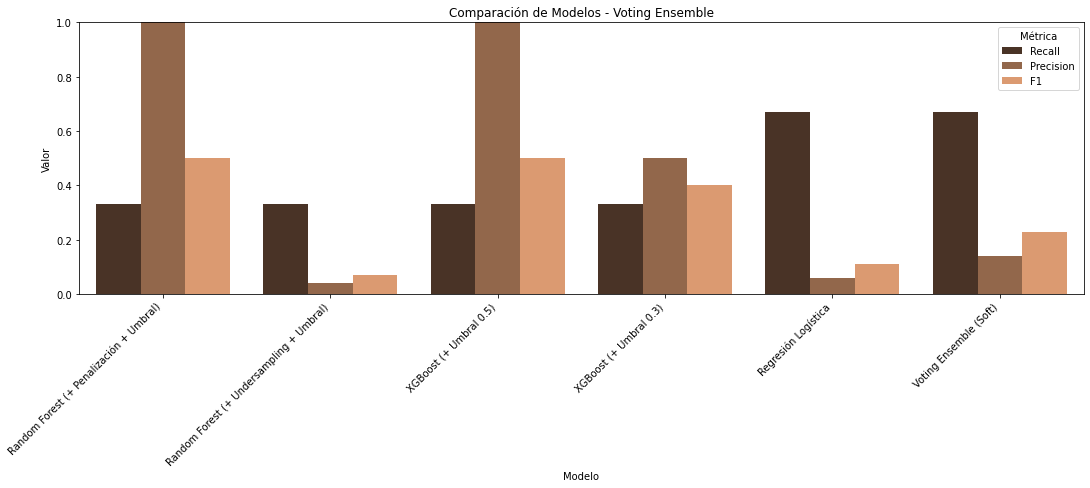

In [47]:
data = {
    'Modelo': ['Random Forest (+ Penalización + Umbral)','Random Forest (+ Undersampling + Umbral)', 'XGBoost (+ Umbral 0.5)',	'XGBoost (+ Umbral 0.3)','Regresión Logística','Voting Ensemble (Soft)'],
    'Recall': [0.33, 0.33, 0.33, 0.33, 0.67, 0.67],
    'Precision': [1, 0.04, 1, 0.5, 0.06, 0.14],
    'F1': [0.50, 0.07, 0.5, 0.4, 0.11, 0.23]
}

df = pd.DataFrame(data)

# Convertimos a formato largo
df_melt = df.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

plt.figure(figsize=(18,5))
sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=df_melt, palette='copper')
plt.title('Comparación de Modelos - Voting Ensemble')

plt.xticks(rotation=45, ha='right') # Rotar los titulos para que no se superpongan
plt.ylim(0,1)
plt.show()


En el gráfico se observa que, si bien el primer y tercer modelo presentan una maxima precisión y probablemente también una buena exactitud, esto implica que detectan pocos fraudes, aunque los acierten todos. En este tipo de análisis no resulta conveniente elegirlos, sino optar por modelos con mayor recall (sensibilidad), ya que es preferible detectar más casos, aunque se generen más alertas para revisar.
Por ejemplo, un modelo con 100 % de precisión pero 30 % de recall solo identifica 3 de cada 10 fraudes reales, dejando escapar los otros 7; en cambio otro con 60 % de recall y 15 % de precisión puede emitir más falsas alarmas, pero logra capturar 6 de cada 10 fraudes, lo que en la práctica reduce significativamente las pérdidas y mejora la protección general del sistema.

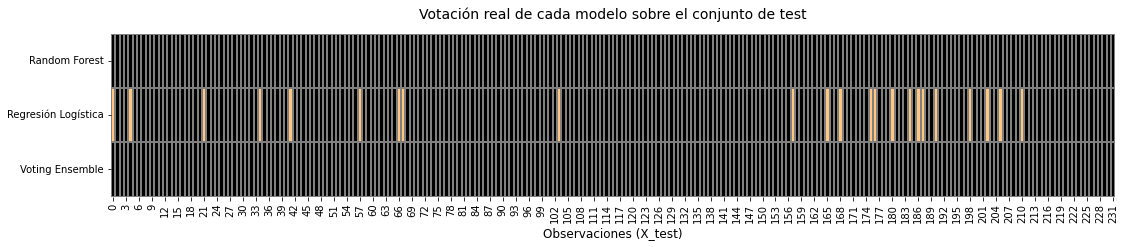

In [48]:
# Obtener las predicciones individuales de cada modelo RF, LR y del ensemble.
pred_rf = ensemble.named_estimators_['rf'].predict(X_test)
pred_lr = ensemble.named_estimators_['lr'].predict(X_test)
pred_ensemble = ensemble.predict(X_test)

# Crear un nuevo dataframe con como fueron las votaciones reales. 
df_votes = pd.DataFrame({
    'Random Forest': pred_rf,
    'Regresión Logística': pred_lr,
    'Voting Ensemble': pred_ensemble
})

# Mostrarlo en un grafico.
plt.figure(figsize=(18, 3))
sns.heatmap(
    df_votes.T,
    cmap='copper',
    cbar=False,
    linewidths=0.07,
    linecolor='gray'
)
plt.title('Votación real de cada modelo sobre el conjunto de test', fontsize=14, pad=15)
plt.xlabel('Observaciones (X_test)', fontsize=12)
plt.ylabel('', fontsize=12)
plt.show()



Interpretando como fue la votación entre los modelos, tenemos que el Random Forest con todo oscuro, significa que predijo casi todas las observaciones como normales (clase 0). Esto es muy común cuando hay desbalance y aunque tenga alta precisión no detecta casi ningún fraude. Es muy conservador, evita falsos positivos pero deja pasar muchos fraudes como si fueran operaciones normales.
Por el lado de la Regresión Logística representa con rayas claras (algunos fraudes=1), indica que está siendo más sensible detectando algunos fraudes (1) generando más alertas (tambien más falsos positivos) pero recupera más casos reales.
Por ultimo abajo del grafico en representando al Voting Ensemble, rayas oscuras (más parecido al 0), al ser un voto blando (soft) promedia las probabilidades de los dos modelos. Si el Random Forest domina con muchas predicciones 0 y la logística solo marca algunos 1 el ensemble hereda la tendencia conservadora del Random Forest resultando en mayoría de 0.

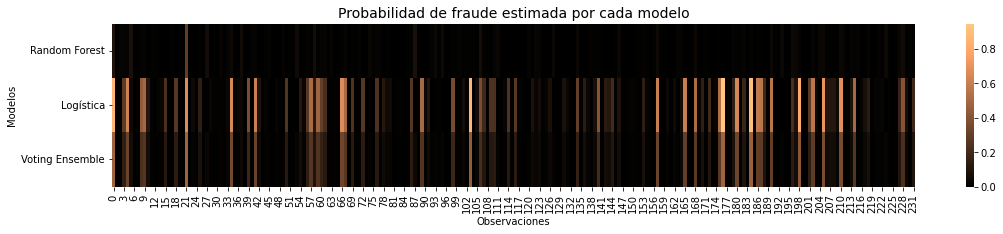

In [49]:
# Obtener las predicciones individuales de cada modelo RF, LR y del ensemble.
probs_rf = ensemble.named_estimators_['rf'].predict_proba(X_test)[:,1]
probs_lr = ensemble.named_estimators_['lr'].predict_proba(X_test)[:,1]
probs_ens = ensemble.predict_proba(X_test)[:,1]
# Crear un nuevo dataframe con las predicciones reales. 
df_probs = pd.DataFrame({
    'Random Forest': probs_rf,
    'Logística': probs_lr,
    'Voting Ensemble': probs_ens
})
# Graficar los resultados.
plt.figure(figsize=(18,3))
sns.heatmap(df_probs.T, cmap='copper', cbar=True)
plt.title('Probabilidad de fraude estimada por cada modelo', fontsize=14)
plt.xlabel('Observaciones')
plt.ylabel('Modelos')
plt.show()


En este gráfico se aprecia con mayor detalle el comportamiento de los modelos. A diferencia del gráfico anterior, aquí no se muestran predicciones binarias (0 o 1), sino las probabilidades de pertenecer a cada clase.

Esto permite visualizar los niveles de consenso entre modelos donde las zonas más claras corresponden a mayores probabilidades de fraude. Por ejemplo, puntualmente en la línea 21 ambos modelos detectaron fraude, por lo que el Voting Ensemble refleja un valor promedio entre esas probabilidades, dando lugar a un color intermedio o más tenue.

---
✍️ Autor: Néstor Díaz — Contador Público | Analista de Datos | Machine Learning

📅 Proyecto: Machine Learning aplicado a la detección de fraudes bancarios

---